In [ ]:
'''
SIFT,HOG
图像梯度：沿着图像的横轴和纵轴分别计算像素的差异(左邻和右邻，上邻和下邻)
图像梯度是个向量，有方向和大小，
mask滤波[1,0,-1],卷积操作：
'''

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data,color

In [9]:
# 加载图像，并转换为灰度模式
image = color.rgb2gray(data.chelsea()) # 300 X 451

# 中心化的一维滤波器计算水平梯度
gx = np.empty(image.shape,dtype=np.double)
# 计算左右邻梯度
gx[:,0] = 0 # 第一列全为0
gx[:,-1] = 0 # 最后一列全为0
gx[:,1:-1] = image[:,:-2] - image[:,2:] # 第二列到倒数第二列
# 计算上下邻梯度
gy = np.empty(image.shape,dtype=np.double)
gy[0,:] = 0
gy[-1,:] = 0
gy[1:-1,:] = image[:-2,:] - image[2:,:]


((300, 451), (300, 451), (300, 451))

In [10]:
image.shape,gx.shape,gy.shape

((300, 451), (300, 451), (300, 451))

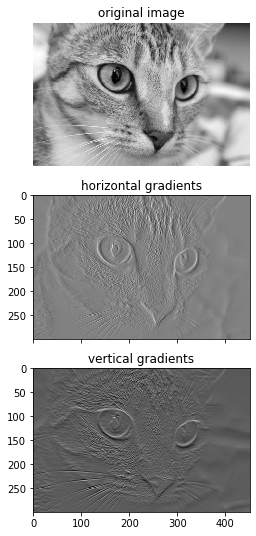

In [16]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(5,9),sharex=True,sharey=True)
ax1.axis("off")
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title("original image")
ax1.set_adjustable('box')

ax2.imshow(gx,cmap=plt.cm.gray)
ax2.set_title("horizontal gradients")
ax2.set_adjustable('box')

ax3.imshow(gy,cmap=plt.cm.gray)
ax3.set_title("vertical gradients")
ax3.set_adjustable('box')

'''
注意：水平梯度表现出了强烈的垂直模式，眼睛内部边缘，而垂直梯度则提取了强烈的水平模式
'''

In [61]:
#高斯滤波器
import numpy as np
ind = [-1., -0.5, 0., 0.5, 1.]
X,Y = np.meshgrid(ind,ind) # 网格点
X,Y, X.shape,Y.shape


ind2 = [-0.5,-5.,0.,5.,0.5]
X2,Y2 = np.meshgrid(ind2,ind2) # 网格点
X2,Y2, X2.shape,Y2.shape

(array([[-0.5, -5. ,  0. ,  5. ,  0.5],
        [-0.5, -5. ,  0. ,  5. ,  0.5],
        [-0.5, -5. ,  0. ,  5. ,  0.5],
        [-0.5, -5. ,  0. ,  5. ,  0.5],
        [-0.5, -5. ,  0. ,  5. ,  0.5]]),
 array([[-0.5, -0.5, -0.5, -0.5, -0.5],
        [-5. , -5. , -5. , -5. , -5. ],
        [ 0. ,  0. ,  0. ,  0. ,  0. ],
        [ 5. ,  5. ,  5. ,  5. ,  5. ],
        [ 0.5,  0.5,  0.5,  0.5,  0.5]]),
 (5, 5),
 (5, 5))

In [62]:
# G是个简单，未归一化的高斯核，其中（0,0）处值为1.0
G = np.exp(-(np.multiply(X,X) + np.multiply(Y,Y))/2) # e ** -(x*x + y*y)
G2 = np.exp(-(np.multiply(X2,X2) + np.multiply(Y2,Y2))/2) # e ** -(x*x + y*y)
G,G2

(array([[0.36787944, 0.53526143, 0.60653066, 0.53526143, 0.36787944],
        [0.53526143, 0.77880078, 0.8824969 , 0.77880078, 0.53526143],
        [0.60653066, 0.8824969 , 1.        , 0.8824969 , 0.60653066],
        [0.53526143, 0.77880078, 0.8824969 , 0.77880078, 0.53526143],
        [0.36787944, 0.53526143, 0.60653066, 0.53526143, 0.36787944]]),
 array([[7.78800783e-01, 3.28875988e-06, 8.82496903e-01, 3.28875988e-06,
         7.78800783e-01],
        [3.28875988e-06, 1.38879439e-11, 3.72665317e-06, 1.38879439e-11,
         3.28875988e-06],
        [8.82496903e-01, 3.72665317e-06, 1.00000000e+00, 3.72665317e-06,
         8.82496903e-01],
        [3.28875988e-06, 1.38879439e-11, 3.72665317e-06, 1.38879439e-11,
         3.28875988e-06],
        [7.78800783e-01, 3.28875988e-06, 8.82496903e-01, 3.28875988e-06,
         7.78800783e-01]]))

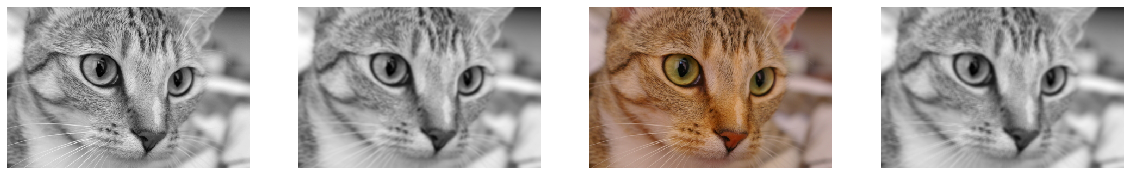

In [64]:
from skimage import data,color
chelsea = data.chelsea()
cat = color.rgb2gray(data.chelsea())
from scipy import signal # 信号
blurred_cat = signal.convolve2d(cat, G, mode='valid') # 2维卷积，使用高斯滤波器
import matplotlib.pyplot as plt
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,4),sharex=True,sharey=True)

ax1.axis("off")
ax1.imshow(cat,cmap=plt.cm.gray)
ax2.set_adjustable('box')

ax2.axis("off")
ax2.imshow(blurred_cat,cmap=plt.cm.gray)
ax2.set_adjustable('box')

ax3.axis("off")
ax3.imshow(chelsea)
ax2.set_adjustable('box')

cat_g2 = signal.convolve2d(cat,G2,mode='valid')
ax4.axis("off")
ax4.imshow(cat_g2,cmap=plt.cm.gray)
ax2.set_adjustable('box')

In [ ]:
# 论文推荐系统
# 第一版：使用字典的方式将列表字段,使用pd.DataFrame.from_dict来形成one0hot编码,最后计算特征的余弦相似度矩阵
# 有些栏位是list格式，有些不是，处理这些特征，做一个类似one-hot编码
np.unique() # 返回排序的唯一数组，可以带有Index,和频率
unique_fos = sorted(set(list(feature for paper in df['fos'].fillna(0) for feature in paper)) # set唯一值，sorted排序，或者直接np.unique
unique_years = sorted(df['year'].astype('str').unique()) # 类型转换，唯一值，排序，方便后续编码

def feature_array(x,var,unique_array): # 输入df.Series, var, 
    row_dict = {}
    for i in x.index:
        var_dict = {}
        for j in range(len(unique_array)):
            if type(x[i]) is list:
                if unique_array[j] in x[i]:
                    var_dict.update({var + '_' + unique_array[j] : 1}) # {'col1':0,'col2':1}
                else:
                    var_dict.update({var + ' ' + unique_array[j] : 0})
            else:
                if unique_array[j] == str(x[i]):
                    var_dict.update({var + '_' + unique_array[j] : 1})
                else:
                    var_dict.update({var + ' ' + unique_array[j] : 0})
         row_dict.update({i: var_dict}) {0:{},1:{}}
    
    #eature_df = pd.DataFrame.from_dict(row_dict,dtyp='str').T # from_dict
    eature_df = pd.DataFrame.from_dict(row_dict,dtyp='str',orient='index') #返回 n * d
    return feature_df

year_features = feature_array(model_df['year'],"fea",unique_years)# n * d1
fos_features = feature_array(model_df['fos'],'fea',unique_fos)# n * d2

first_features = fos_features.join(year_features).T # n *( d1 + d2)

In [93]:

from scipy.spatial.distance import cosine # 空间距离，
from sklearn.metrics.pairwise import cosine_similarity # 余弦相似度


# 协同过滤，查找相似项目
def item_collb_filter(feature_df):
    # 相似度计算，协方差
    item_similar = pd.DataFrame(index=feature_df.columns, columns=feature_df.columns) #特征数据的index和columns都设定
    
    for i in features_df.columns:
        for j in features_df.columns: # cosine距离越小越类似
            item_similar.loc[i][j] = 1 - consine(features_df[i],features_df[j]) # 第i行和第j行的cosine距离
    
    return item_similar

first_items = item_collb_filter(first_features.loc[:,0:1000])
        

NameError: name 'first_features' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
# 论文推荐第二版：特征的等宽分箱+虚拟编码
bins = int(round((model_df['year'].max() - model_df['year'].min()) / 10 )) # 每个分箱间隔10
temp_df = pd.DataFrame(index=model_df.index) # 临时df，设置Index
temp_df['yearBinned'] = pd.cut(model_df['year'].tolist(), bins, precision=0) # 分箱
X_yrs = pd.get_dummies(temp_df['yearBinned']) # 分箱后再虚拟编码
X_yrs.columns.categories

In [ ]:
fig,ax = plt.subplots()
X_yrs.sum().plot.bar(ax = ax) # 

In [ ]:

def paper_recommender(paper_ix, items_df):
    print('based on paper: \nindex= ', paper_ix)
    print(model_df.iloc[paper_ix])
    top_result = items_df.loc[paper_ix].sort_values(ascending=False).head(4)# 从余弦相似度矩阵中找出前k个最相似的
    
    for i in top_resuls.index.tolist()[-3:] # df中取一行记录时，原先df中的column这时变成该记录的index

In [100]:
import pandas as pd
x = pd.Series(np.random.randint(1,20,10)) # 
x

0    14
1     9
2     7
3    15
4     9
5     2
6    15
7     8
8    15
9     4
dtype: int32

In [101]:
#dir(x.plot)

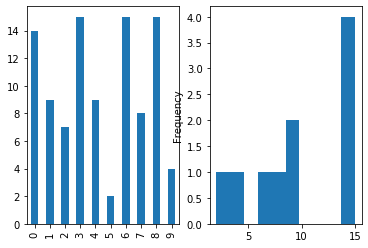

In [102]:
# 更多特征工程和更智能的模型
fig,(ax1,ax2) = plt.subplots(1,2)
#plot属性可以画hist,bar,line,kde,pie,density
x.plot.bar(ax=ax1) # hist图是统计数据频率（直方图,所以只需一维数据），bar图是统计实际数据(二维数据)
x.plot.hist(ax=ax2)
#dir(x.plot)


In [94]:
论文推荐第二版：第一版的特征dataframe转为np.ndarray,使用
#fos短语袋从pd.Series转换为numpy系数数组，pd.Series有2.5GB，而numpy只有112byte
X_fos = fos_features.values # n * d1， values转换成np.ndarray
X_yrs = year_features.values # n * d2
second_feaures = np.append(X_fos,X_yrs,axis=1) # 水平扩展 n* (d1+d2)

from sklearn.metric.pairwise import cosine_similarity # 夹角

# 建立项目特征矩阵，搜索相似项目
def piped_collab_filter(features_matrix, index, top_n): # 某个项目和其它所有项目的相似度
    item_similar = 1 - cosine_similarity(features_maxtir[index:index+1],features_matrix).flatten() # 数据flattern扁平
    
    related_indices = [i for i in item_similar.argsort()[::-1] if i!=index] # argsort排序索引，[::-1]倒排，相当于reversed
    
    return [(index, item_similar[index]) for index in related_indices][0:top_n] # 前n个除了自己
    

def paper_recommender(iterms_df,paper_ix,top_n): # 每次输入一个要查询的ix
    if paper_ix in model_df.index:
        print('paper index= ', model_df[paper_ix]['title'] )
        # 通过数据框索引定义需要的数据位置
        array_ix = model_df.index.get_loc(paper_ix) # index也可能是字符串，所以df.index.get_loc('ix')得到索引的整数排序
        top_results = piped_collab_filter(iterms_df, array_ix,top_n)
        
        order =1
        for i in range(len(top_results)):
            print(order,'.paper index = ', model_df.iloc(top_results[i][0]))
            print('score = ', top_results[i][1])
        if order < top_n: order +=1
    else:
        print('choose anohter paper')

paper_recommender(second_features,2,3)

NameError: name 'fos_features' is not defined

In [103]:
# 找到你的位置，pd和np之间的转换中，
# .loc，基于初始数据框的索引
# .iloc，使用整数位置（自然顺序），和np数组的索引一样的。
# .get_loc在已知数据框索引时找出整数位置

In [105]:
# 论文搜索第三版：更多特征=更多信息
# 现有特征出版年份和研究领域
# 改善办法：1）使用原始数据集中更多数据，2）花费更多时间去探索数据，找一个密集集合，3）添加更多特征，继续迭代当前模型
# 特征：论文摘要和作者姓名，文字的tf-idf

# 过滤掉NaN值，供sklearn以后使用
filled_df = model_df.fillna("None")
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
vectorizer = TfidfVectorizer(sublinear_tf=True,max_df=0.5,stop_words='english')
tfidf_trans = TfidfTransformer()

X_abstract = vectorizer.fit_transform(filled_df['abstract']) # 文摘tfidf编码，返回稀疏矩阵
third_features = np.append(second_features, X_abstract.toarray(),axis=1) # 添加tfidf特征，放大稀有词，减弱常用词

#论文作者整理成字典，再one-hot编码
authors = [] # 字典列表
for row in filled_df['authors'].itertuples():
    
    if type(row.authors) is str:
        y = {"None":row.Index} # 空值
    if type(row.authors) is list:
        y = dict.fromkeys(row.authors[0].values(), row.Index) # 不同key,相同value
    authors.append(y)
    

from sklearn.feature_extraction import DictVectorizer # 字典向量化
v = DictVectorizer(sparse=False)
X_authors = v.fit_transform(authors)
fourth_features = np.append(third_features,X_authoris,axis=1)# 拼接作者特征

paper_recommder(fourth_feature,2,3)

In [128]:
ss = pd.DataFrame({"a":np.array([2,4,6,8,16]),"b":np.array([22,44,55,66,66])},index=['a','b','c','d','e'])
for i in ss.itertuples(): # iteritems,iterrows
    if type(i) is str:
        print(i.Index)
    if type(i['a']) is list:
        y = dict.fromkeys(i['a'][0].values(),i.Index) # 不同key,相同value
        print(y)
    
#for i in ss.iteritems(): #每列
#    print(i)
#for i in ss.iterrows(): # 每行
#    print(i)

TypeError: tuple indices must be integers or slices, not str

In [129]:
# 继续迭代，比如找出题目中的名词短语，或者对关键词干提取

In [133]:
# 假设检验
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats import anova

t.cdf(25.3,df=24)



1.0

In [164]:
%%time
from scipy.stats import shapiro
data = np.random.randn(10) + 2
stat,p = shapiro(data)
print(stat,p)

0.9749583005905151 0.9326306581497192
Wall time: 76 ms


In [167]:
from scipy.stats import normaltest
%time stat,p = normaltest(np.random.randint(0,100,1000))

Wall time: 1e+03 µs


In [168]:
stat,p

(482.4718141361613, 1.7083494941368346e-105)

In [193]:
from scipy.stats import ttest_ind
data1 = np.random.randn(200) + 1
data2 = np.random.randn(100) + 1.1
stat,p=ttest_ind(data1,data2)
stat,p

(1.0212120888071492, 0.30798227908034487)